# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [64]:
# Add Matplotlib inline magic command
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import time
import matplotlib.dates as mdates

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [65]:
# Combine the data into a single dataset
pyber_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame

In [66]:
#  1. Get the total rides for each city type
rides_total = pyber_df.groupby(['type']).count()['ride_id']

In [67]:
# 2. Get the total drivers for each city type
drivers_total = city_df.groupby(['type']).sum()['driver_count']

In [68]:
#  3. Get the total amount of fares for each city type
fares_total = pyber_df.groupby(['type']).sum()['fare']

In [69]:
#  4. Get the average fare per ride for each city type. 
fares_avg_ride = fares_total / rides_total

In [70]:
# 5. Get the average fare per driver for each city type. 
fares_avg_drivers = fares_total / drivers_total

In [71]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame({
    "Total Rides": rides_total,
    "Total Drivers": drivers_total,
    "Total Fares": fares_total,
    "Average Fare per Ride": fares_avg_ride,
    "Average Fare per Driver": fares_avg_drivers
})

In [72]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None

In [73]:
#  8. Format the columns.
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [74]:
# 1. Read the merged DataFrame
pyber_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [75]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_df_pivot = pyber_df.groupby(["date", "type"]).sum()[["fare"]]

In [76]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_df_pivot = pyber_df_pivot.reset_index()

In [77]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_df_pivot = pyber_df_pivot.pivot(
    index = "date", 
    columns = "type",
    values = "fare"
)

In [78]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_df_pivot = pyber_df_pivot.loc["2019-01-01": "2019-04-29"]


In [79]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_df_pivot.index = pd.to_datetime(pyber_df_pivot.index)

In [80]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [81]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_sum_week = pyber_df_pivot.resample("W").sum()

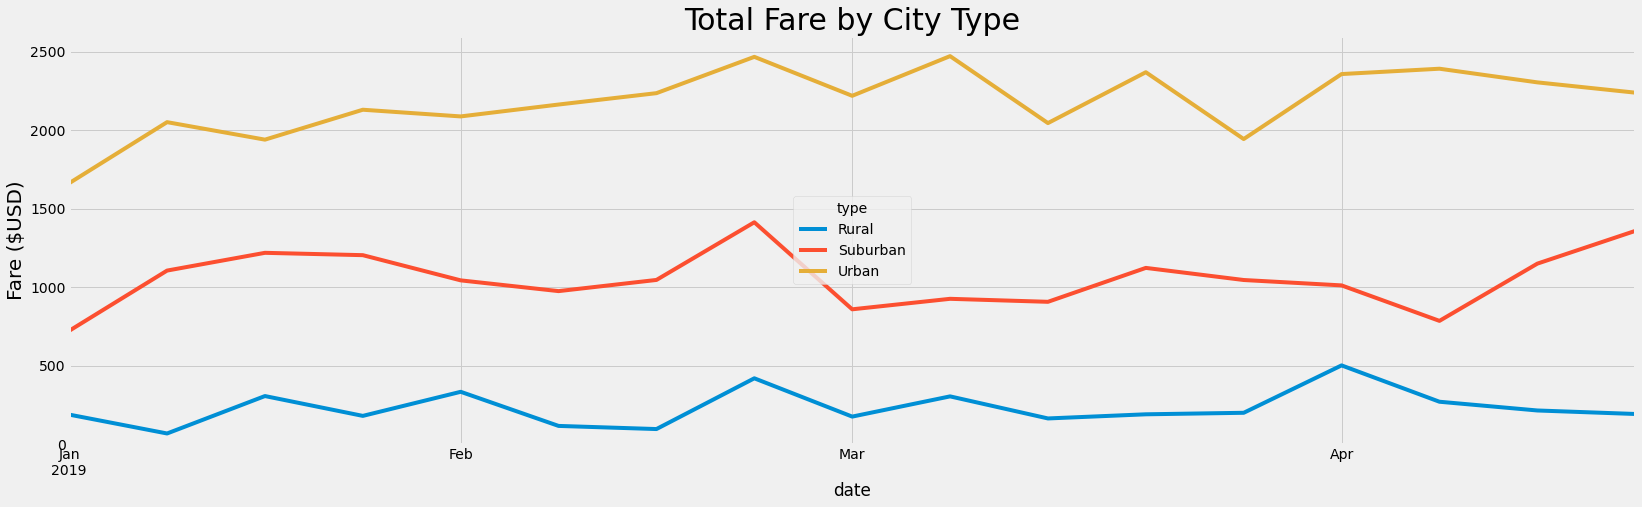

In [86]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fares_sum_week.plot(
    figsize = (25, 7),
    kind = "line"
)
plt.ylim(0, 2600)
plt.ylabel(
    "Fare ($USD)",
    fontsize = "20"
)
plt.title(
    "Total Fare by City Type",
    fontsize = 30
)

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save graph in /analysis
plt.savefig("analysis/PyBer_fare_summary.png")